In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('/Users/spider-myan/Documents/PDS_Assignment1_Problem2/data_raw/StudentsPerformance.csv')

In [3]:
base_dir = '/Users/spider-myan/Documents/PDS_Assignment1_Problem2'
data_raw_dir = os.path.join(base_dir, 'data_raw')
data_clean_dir = os.path.join(base_dir, 'data_clean')
src_dir = os.path.join(base_dir, 'src')
result_dir = os.path.join(base_dir, 'result')

In [4]:
os.makedirs(data_raw_dir, exist_ok=True)
os.makedirs(data_clean_dir, exist_ok=True)
os.makedirs(src_dir, exist_ok=True)
os.makedirs(result_dir, exist_ok=True)

In [5]:
data_path = os.path.join(data_raw_dir, 'StudentsPerformance.csv')
df = pd.read_csv(data_path)

In [6]:
df_clean = df.dropna()

In [7]:
clean_data_path = os.path.join(data_clean_dir, 'Clean_StudentsPerformance.csv')
df_clean.to_csv(clean_data_path, index=False)

/var/folders/gz/2nhd43814rx4gxvlz_khgcp40000gn/T/ipykernel_9249/2503181467.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='gender', y='math score', data=df_clean, palette="Set2", width=0.6, fliersize=0)


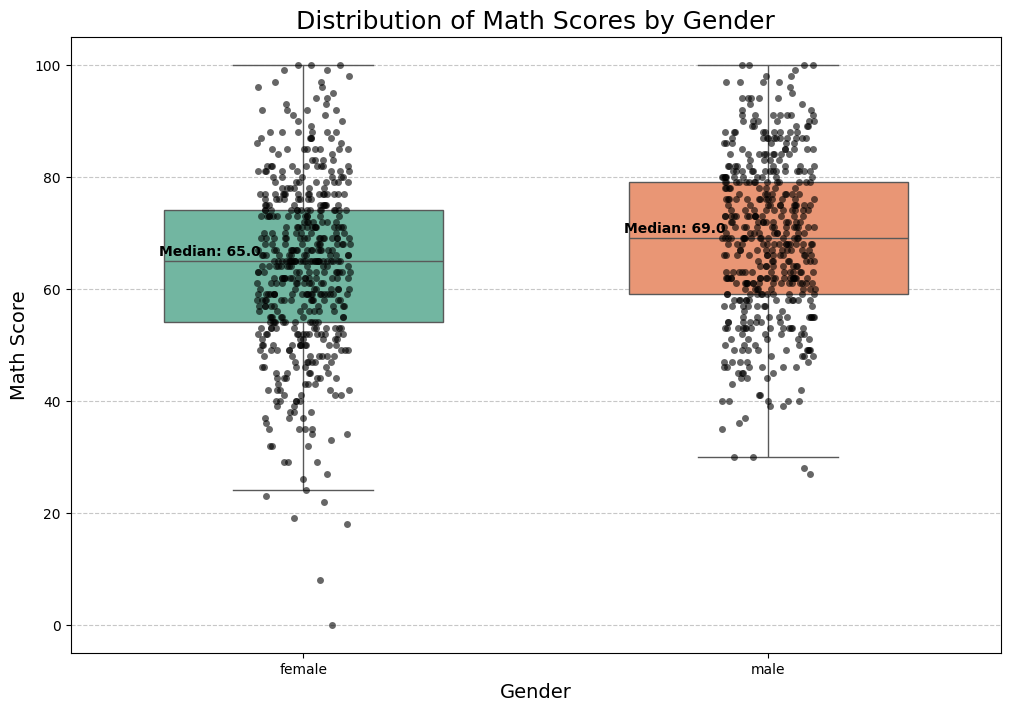

In [8]:
plt.figure(figsize=(12, 8))

sns.boxplot(x='gender', y='math score', data=df_clean, palette="Set2", width=0.6, fliersize=0)
sns.stripplot(x='gender', y='math score', data=df_clean, color="black", size=5, jitter=True, alpha=0.6)
plt.title('Distribution of Math Scores by Gender', fontsize=18)
plt.xlabel('Gender', fontsize=14)
plt.ylabel('Math Score', fontsize=14)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
median_female = df_clean[df_clean['gender'] == 'female']['math score'].median()
median_male = df_clean[df_clean['gender'] == 'male']['math score'].median()
plt.text(-0.2, median_female + 1, f'Median: {median_female}', horizontalalignment='center', size='medium', color='black', weight='semibold')
plt.text(0.8, median_male + 1, f'Median: {median_male}', horizontalalignment='center', size='medium', color='black', weight='semibold')
plt.savefig(os.path.join(result_dir, 'improved_math_scores_by_gender.png'))
plt.show()

<Figure size 1200x800 with 0 Axes>

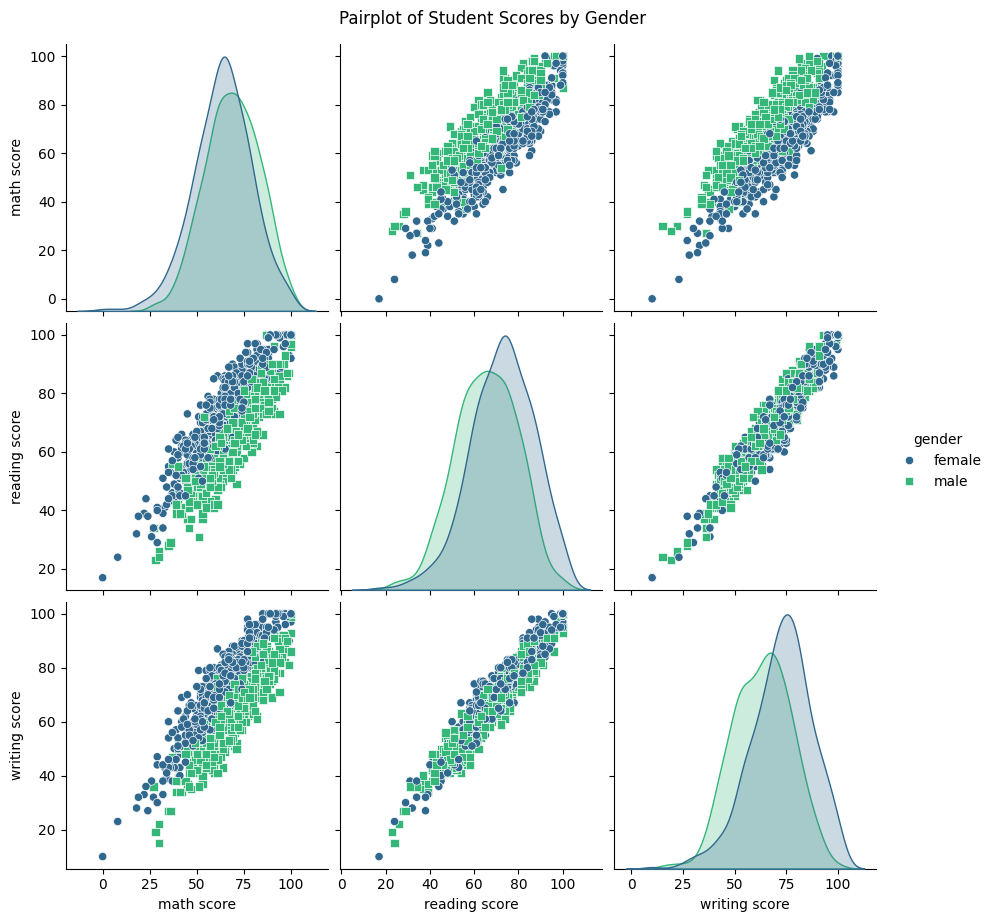

In [9]:
plt.figure(figsize=(12, 8))
pairplot = sns.pairplot(
    df_clean[['math score', 'reading score', 'writing score', 'gender']],
    hue='gender',
    palette='viridis',
    markers=["o", "s"],
    height=3
)
pairplot.fig.suptitle('Pairplot of Student Scores by Gender', y=1.02)
plt.savefig(os.path.join(result_dir, 'pairplot_scores.png'))
plt.show()

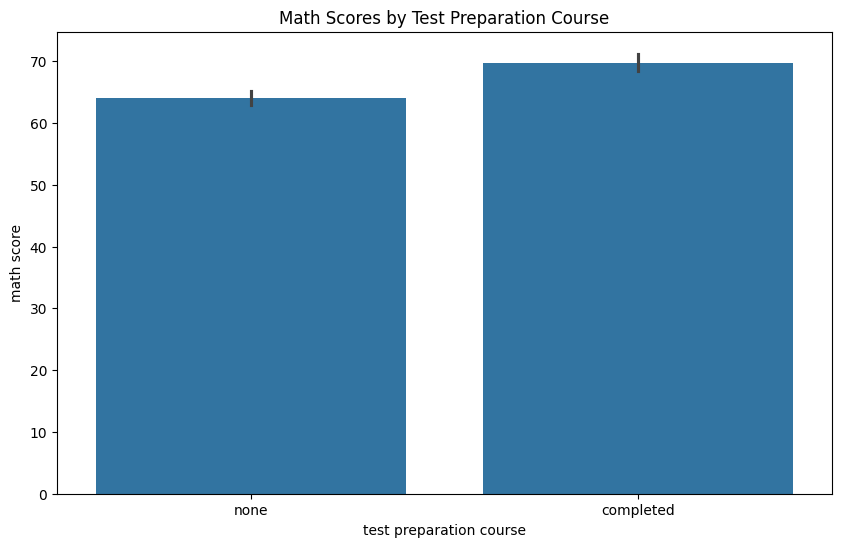

In [10]:
plt.figure(figsize=(10, 6))
sns.barplot(x='test preparation course', y='math score', data=df_clean)
plt.title('Math Scores by Test Preparation Course')
plt.savefig(os.path.join(result_dir, 'math_scores_test_prep.png'))
plt.show()

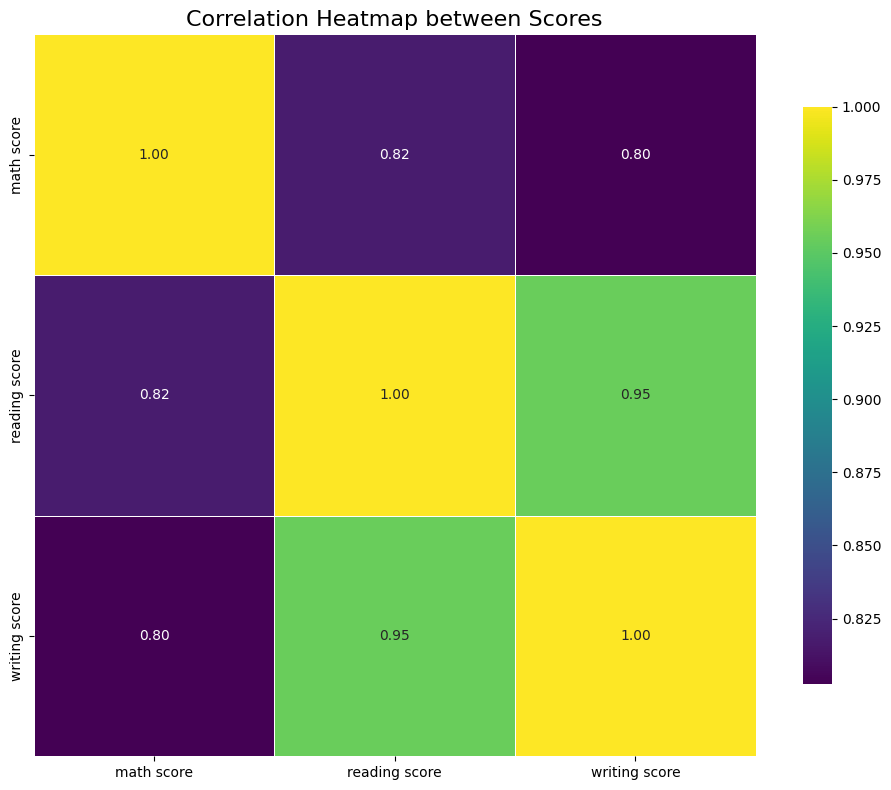

In [11]:
corr = df_clean[['math score', 'reading score', 'writing score']].corr()
plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",                  
    cmap='viridis',            
    cbar_kws={"shrink": .8},  
    square=True,             
    linewidths=0.5,     
    linecolor='white'    
)
plt.title('Correlation Heatmap between Scores', fontsize=16)
plt.tight_layout()
plt.savefig(os.path.join(result_dir, 'correlation_heatmap_scores.png')) 
plt.show()

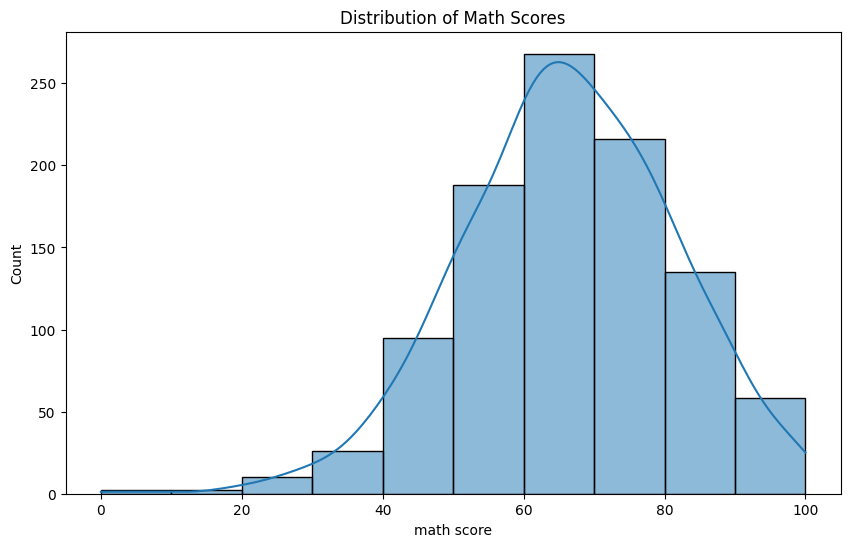

In [12]:
plt.figure(figsize=(10, 6))
sns.histplot(df_clean['math score'], bins=10, kde=True)
plt.title('Distribution of Math Scores')
plt.savefig(os.path.join(result_dir, 'math_scores_distribution.png'))
plt.show()